In [1]:
!which python

/Users/sohamroy/Pycharm Projects/fle_3d-main/.venv/bin/python


In [8]:
!python --version

Python 3.12.0


In [3]:
# !pip install "numpy<2"
# !pip install scipy
#!pip install finufft
# !pip install mrcfile
# !pip install matplotlib==3.7.5
# !pip install tqdm joblib
# !pip install torch --index-url https://download.pytorch.org/whl/cu118
# !pip install torch-harmonics

In [4]:
!joblib --version

zsh:1: command not found: joblib


In [ ]:
# !pip install torch_find_peaks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 129.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 147.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.8/398.8 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 133.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.7/266.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2

Python 3.12.0


In [1]:
import torch_find_peaks
import torch
from torch_find_peaks import find_peaks_3d

t = torch.randn((64, 64, 64))
peaks = find_peaks_3d(t, threshold_abs=0, min_distance=3)

In [2]:
import sys
print("Executable:", sys.executable)
print("Version:", sys.version)

import torch
print("Torch:", torch.__version__)

Executable: /Users/sohamroy/Pycharm Projects/fle_3d-main/.venv2/bin/python
Version: 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
Torch: 2.9.1


In [3]:
import sys, numpy
print(sys.executable)
print(sys.version)
print(numpy.__version__)

/Users/sohamroy/Pycharm Projects/fle_3d-main/.venv2/bin/python
3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
1.24.4


In [4]:
from fle_3d import FLEBasis3D

In [5]:
import numpy as np
import mrcfile
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import torch
from torch_find_peaks import find_peaks_3d, refine_peaks_3d

In [6]:
import numpy as np
import mrcfile
from fle_3d import FLEBasis3D
import matplotlib.pyplot as plt

In [7]:
import fle_3d
print(fle_3d.__file__)

/Users/sohamroy/Pycharm Projects/fle_3d-main/fle_3d.py


In [8]:
# this loads the ball harmonics expansion -> we use it for rotation invariant volumes
# fle = FLEBasis3D(
#     N = 64,
#     bandlimit = 32,
#     eps = 1e-4)
# load volume


def get_rotation_invariant_volume(fle, volume):
    # forward transform
    coeffs = fle.evaluate_t(volume)

    # create placeholder for rotation invariant coefficients
    coeffs_tmp = np.zeros_like(coeffs)

    # for coefficients alpha_{k,l,m}, we only want l=m=0 terms
    # loop over all k indices
    for k in fle.idlm_list[0][0]:
        coeffs_tmp[k] = coeffs[k]

    # backward transform
    volume_ri = fle.evaluate(coeffs_tmp).real

    # return rotation invariant volume
    return volume_ri



In [9]:
# def get_rotation_invariant_volume(basis, volume):
#     coeffs = basis.evaluate_t(volume)
#     volume_ri = basis.evaluate(coeffs)
#     return volume_ri

In [10]:
# from isotropic_basis_3d import IsotropicBasis3D
# 
# fle = IsotropicBasis3D(
#     N=64,        # same N as before
# )

In [ ]:
import importlib, fle_3d
print("Using:", fle_3d.__file__)
importlib.reload(fle_3d)
from fle_3d import FLEBasis3D
fle = FLEBasis3D(
    N = 64,
    bandlimit = 16,
    eps = 1e-4)

Using: /Users/sohamroy/Pycharm Projects/fle_3d-main/fle_3d.py


Text(0.5, 1.0, 'Rotation invariant volume')

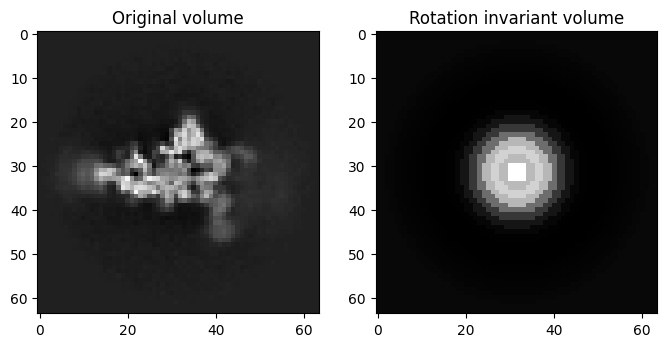

In [72]:

# this only a test volume, use mrcfile.open() for .mrc files
from scipy.io import loadmat
mat = loadmat('test_volumes/data_N=64.mat')["x"]

# get rotation invariant volume
mat_ri = get_rotation_invariant_volume(fle, mat)
temp_ri = get_rotation_invariant_volume(fle, mat)

# plot two volumes
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].imshow(mat[32], cmap='gray')
axs[0].set_title('Original volume')
axs[1].imshow(mat_ri[32], cmap='gray')
axs[1].set_title('Rotation invariant volume')

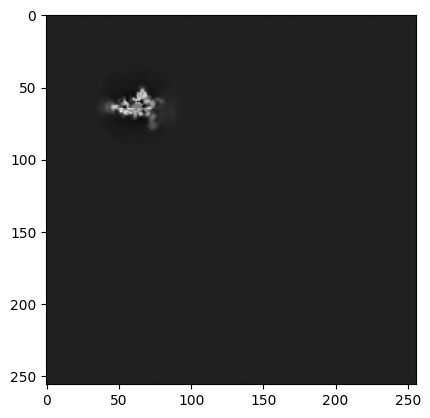

In [73]:
# get tomogram (via mrcfile.open())
# I use dummy volume

tomogram = np.zeros((256, 256, 256), dtype=np.float32)
tomogram[32:96, 32:96, 32:96] = mat
plt.imshow(tomogram[64], cmap='gray')


In [74]:
# Compute cross correlation between the two volumes
# numpy is easy to set up, faster will be something gpu accelerated like cupy or torch

def cross_correlation_3d(vol1, vol2):
    #return cross_correlation_values
    F1 = np.fft.fftn(vol1)
    F2 = np.fft.fftn(vol2)
    cc = np.fft.ifftn(F1 * np.conj(F2))
    cc= np.real(cc)
    return np.fft.ifftshift(cc)

# Then extract locations determined by peaks in the cross correlation volume
def extract_peak(cc):
    # return peak location
    peak = np.argmax(cc)
    idx = np.unravel_index(peak, cc.shape)
    center = np.array(cc.shape)//2
    displacement = np.array(idx)-center

    return idx, displacement, cc[idx]

# Check how well this works if you use the rotation invariant volume or the original volume as reference
# Check how this changes if you rotate the original volume first.


# After that: repeat this for the SHREC dataset. You have access to the correct tempplate.


In [75]:
def cross_correlation_3d(vol1, vol2):
    #return cross_correlation_values
    F1 = np.fft.fftn(vol1)
    F2 = np.fft.fftn(vol2)
    cc = np.fft.ifftn(F1 * np.conj(F2))
    cc= np.real(cc)
    return np.fft.ifftshift(cc)

In [76]:
cross_correlation_3d(temp_ri, mat)

array([[[0.07763737, 0.07787765, 0.08339957, ..., 0.10977656,
         0.09390225, 0.08322524],
        [0.0809821 , 0.08134154, 0.08702937, ..., 0.11318337,
         0.09732034, 0.08657603],
        [0.08988762, 0.08982086, 0.09499006, ..., 0.12242881,
         0.10630083, 0.09526035],
        ...,
        [0.09897396, 0.09769359, 0.10194389, ..., 0.13264405,
         0.11636438, 0.10517758],
        [0.08691345, 0.08614708, 0.09115994, ..., 0.11950157,
         0.10370083, 0.09251187],
        [0.07965795, 0.07955319, 0.08503926, ..., 0.1119166 ,
         0.09602071, 0.08525641]],

       [[0.08212126, 0.08224443, 0.08807116, ..., 0.11393077,
         0.09823924, 0.08731072],
        [0.08561572, 0.0859713 , 0.09141988, ..., 0.11741291,
         0.10160925, 0.09097779],
        [0.09445277, 0.09447196, 0.10002823, ..., 0.12651237,
         0.11071871, 0.09985173],
        ...,
        [0.10318018, 0.10246758, 0.10643954, ..., 0.13718048,
         0.12076237, 0.10940468],
        [0.0

In [77]:
import torch
from torch_find_peaks import find_peaks_3d, refine_peaks_3d

In [78]:
# import pkg_resources
# pkg_resources.get_distribution("torch_harmonics").version

In [79]:
from torch_find_peaks import find_peaks_3d, refine_peaks_3d

def detect_peak_torch(cc, min_distance=3, threshold_abs=0.1, refine=True):
    cc_t = torch.tensor(cc, dtype=torch.float32)

    peaks_tuple = find_peaks_3d(
        cc_t,
        min_distance=min_distance,
        threshold_abs=threshold_abs,
        return_as="torch"
    )
    peaks = peaks_tuple[0] # Extract the peak locations tensor

    if peaks.shape[0] == 0:
        return None, None, None

    if refine:
        refined = refine_peaks_3d(
            cc_t,
            peaks,
            boxsize=8,
            max_iterations=200,
            tolerance=1e-6
        )
        best = refined[0].detach().cpu().numpy()
        amp, z, y, x, *_ = best
        return np.array([z, y, x]), amp, peaks_tuple[0].detach().cpu().numpy()

    # If not refining, still need to get the first peak from the locations tensor
    best = peaks[0].detach().cpu().numpy()
    z, y, x = best
    return np.array([z, y, x]), cc[int(z), int(y), int(x)], peaks_tuple[0].detach().cpu().numpy()

## baseline vs rotation-invariant comparison

In [80]:
template = mat  # synthetic 64×64×64 test volume

angle = 45
rot = rotate(template, angle, axes=(1,2), reshape=False)

# baseline
cc_std = cross_correlation_3d(rot, template)
cc_std

array([[[0.08139129, 0.08879699, 0.10304436, ..., 0.09787317,
         0.08682219, 0.08108528],
        [0.07585296, 0.08418126, 0.09951537, ..., 0.08999273,
         0.07915211, 0.07485058],
        [0.07692435, 0.08667452, 0.10272665, ..., 0.0878627 ,
         0.07751151, 0.0749884 ],
        ...,
        [0.13435387, 0.13850116, 0.14953315, ..., 0.16089205,
         0.14587288, 0.13669529],
        [0.11034993, 0.11554948, 0.128171  , ..., 0.13410789,
         0.12015074, 0.11211936],
        [0.09285998, 0.09902372, 0.11250362, ..., 0.11388827,
         0.10071928, 0.09338379]],

       [[0.08229936, 0.09027033, 0.10530345, ..., 0.09778074,
         0.08636365, 0.08071756],
        [0.07596919, 0.08473773, 0.1008214 , ..., 0.08783443,
         0.07710842, 0.07275427],
        [0.07587405, 0.08615798, 0.10204564, ..., 0.08294153,
         0.07405308, 0.07155543],
        ...,
        [0.13771109, 0.1422655 , 0.15391649, ..., 0.16477635,
         0.14924658, 0.14013209],
        [0.1

In [81]:
cc_std.dtype

dtype('float64')

In [82]:
cc_t = torch.from_numpy(cc_std)
cc_t


tensor([[[0.0814, 0.0888, 0.1030,  ..., 0.0979, 0.0868, 0.0811],
         [0.0759, 0.0842, 0.0995,  ..., 0.0900, 0.0792, 0.0749],
         [0.0769, 0.0867, 0.1027,  ..., 0.0879, 0.0775, 0.0750],
         ...,
         [0.1344, 0.1385, 0.1495,  ..., 0.1609, 0.1459, 0.1367],
         [0.1103, 0.1155, 0.1282,  ..., 0.1341, 0.1202, 0.1121],
         [0.0929, 0.0990, 0.1125,  ..., 0.1139, 0.1007, 0.0934]],

        [[0.0823, 0.0903, 0.1053,  ..., 0.0978, 0.0864, 0.0807],
         [0.0760, 0.0847, 0.1008,  ..., 0.0878, 0.0771, 0.0728],
         [0.0759, 0.0862, 0.1020,  ..., 0.0829, 0.0741, 0.0716],
         ...,
         [0.1377, 0.1423, 0.1539,  ..., 0.1648, 0.1492, 0.1401],
         [0.1132, 0.1187, 0.1315,  ..., 0.1363, 0.1229, 0.1147],
         [0.0943, 0.1013, 0.1153,  ..., 0.1143, 0.1017, 0.0947]],

        [[0.0870, 0.0960, 0.1109,  ..., 0.0994, 0.0883, 0.0839],
         [0.0787, 0.0892, 0.1053,  ..., 0.0873, 0.0776, 0.0749],
         [0.0755, 0.0879, 0.1055,  ..., 0.0815, 0.0727, 0.

In [83]:
cc_std

array([[[0.08139129, 0.08879699, 0.10304436, ..., 0.09787317,
         0.08682219, 0.08108528],
        [0.07585296, 0.08418126, 0.09951537, ..., 0.08999273,
         0.07915211, 0.07485058],
        [0.07692435, 0.08667452, 0.10272665, ..., 0.0878627 ,
         0.07751151, 0.0749884 ],
        ...,
        [0.13435387, 0.13850116, 0.14953315, ..., 0.16089205,
         0.14587288, 0.13669529],
        [0.11034993, 0.11554948, 0.128171  , ..., 0.13410789,
         0.12015074, 0.11211936],
        [0.09285998, 0.09902372, 0.11250362, ..., 0.11388827,
         0.10071928, 0.09338379]],

       [[0.08229936, 0.09027033, 0.10530345, ..., 0.09778074,
         0.08636365, 0.08071756],
        [0.07596919, 0.08473773, 0.1008214 , ..., 0.08783443,
         0.07710842, 0.07275427],
        [0.07587405, 0.08615798, 0.10204564, ..., 0.08294153,
         0.07405308, 0.07155543],
        ...,
        [0.13771109, 0.1422655 , 0.15391649, ..., 0.16477635,
         0.14924658, 0.14013209],
        [0.1

In [84]:
peaks = find_peaks_3d(
        cc_std,
        min_distance=3,
        threshold_abs=0.1,
        return_as="torch")

In [85]:

loc_std, amp_std, _ = detect_peak_torch(cc_std, min_distance=3, threshold_abs=0.1, refine=False)
#loc_std, amp_std, _ = detect_peak_torch(cc_std)

# rotation invariant
temp_ri = get_rotation_invariant_volume(fle, template)
#temp_ri=mat_ri


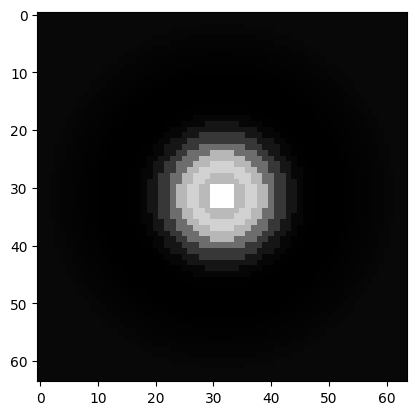

In [86]:
plt.imshow(temp_ri[32], cmap='gray')

In [87]:
#temp_ri = get_rotation_invariant_volume(fle, mat)

In [88]:
rot_ri = get_rotation_invariant_volume(fle, rot)

cc_ri = cross_correlation_3d(rot_ri, temp_ri)
loc_ri, amp_ri, _ = detect_peak_torch(cc_ri)

print("Standard CC:", loc_std, amp_std)
print("Rotation-Invariant CC:", loc_ri, amp_ri)

Standard CC: [ 0 19 27] 2.1516308786974037
Rotation-Invariant CC: [ 1.5810107  8.372827  31.509249 ] 1.4709458


## Rotational sweep

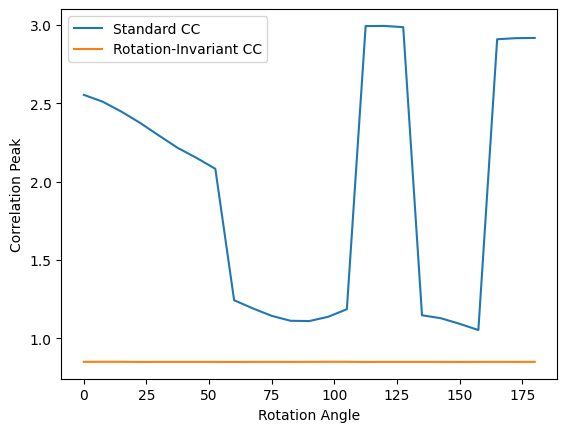

In [89]:
angles = np.linspace(0, 180, 25)
peaks_std = []
peaks_ri = []

for ang in angles:
    rotated = rotate(template, ang, axes=(1,2), reshape=False)

    cc = cross_correlation_3d(rotated, template)
    _, amp_std, _ = detect_peak_torch(cc, refine=False)
    peaks_std.append(amp_std)

    rotated_ri = get_rotation_invariant_volume(fle, rotated)
    cc2 = cross_correlation_3d(rotated_ri, temp_ri)
    _, amp_ri, _ = detect_peak_torch(cc2, refine=False)
    peaks_ri.append(amp_ri)

plt.plot(angles, peaks_std, label="Standard CC")
plt.plot(angles, peaks_ri, label="Rotation-Invariant CC")
plt.xlabel("Rotation Angle")
plt.ylabel("Correlation Peak")
plt.legend()
plt.show()

## Shrec dataset

In [90]:
def extract_patch(volume, center, size=64):
    """
    Extract a cubic patch of shape (size, size, size) around a given (z, y, x) center.
    """
    z, y, x = map(int, center)
    half = size // 2

    return volume[
        z-half : z+half,
        y-half : y+half,
        x-half : x+half
    ]

In [91]:
import os
print(os.path.getsize("/Users/sohamroy/Downloads/reconstruction.mrc"))

536871936


/Users/sohamroy/Pycharm Projects/fle_3d-main/.venv2/lib/python3.10/site-packages/mrcfile/mrcinterpreter.py:206: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
/Users/sohamroy/Pycharm Projects/fle_3d-main/.venv2/lib/python3.10/site-packages/mrcfile/mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


(512, 512, 512)
(array([    25,    258,   2882,  25750, 100725, 103596,  26466,   2334,
          103,      5]), array([-2.4152951 , -1.9337765 , -1.4522579 , -0.97073925, -0.48922062,
       -0.00770199,  0.47381663,  0.95533526,  1.4368539 ,  1.9183725 ,
        2.3998911 ], dtype=float32))


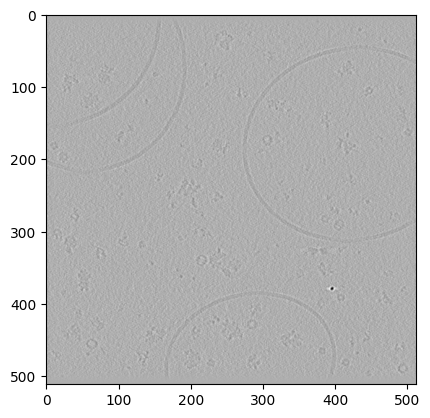

In [92]:
import mrcfile
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
with mrcfile.open("/Users/sohamroy/Downloads/reconstruction.mrc", permissive=True) as m:
    print(m.data.shape)
    plt.imshow(m.data[300],cmap="gray")
    print(np.histogram(m.data[256], bins=10))
    tomo = m.data.astype(np.float32)
    



In [93]:
tomo

array([[[ 0.04030928, -0.02602181, -0.02214897, ..., -0.04319197,
          0.01557835,  0.00593911],
        [-0.01271598,  0.00421418,  0.05841551, ...,  0.04124948,
         -0.00591481, -0.01566215],
        [-0.00769722, -0.00080364, -0.03190477, ...,  0.07048059,
         -0.00395592,  0.00090801],
        ...,
        [ 0.05035904, -0.04545299, -0.0324784 , ...,  0.0171659 ,
         -0.01074323,  0.01330657],
        [-0.0118594 ,  0.00324204, -0.01576201, ...,  0.02759492,
         -0.01103598, -0.01896342],
        [-0.02499172,  0.0029509 ,  0.03205818, ..., -0.02127624,
          0.01496664,  0.00136236]],

       [[ 0.03998695,  0.01144229, -0.0191135 , ..., -0.00988961,
          0.04220208, -0.02483092],
        [-0.02030083, -0.0315585 ,  0.02946287, ...,  0.02043258,
         -0.05392187,  0.02200961],
        [ 0.03364852, -0.04699063, -0.00351608, ...,  0.01028064,
         -0.02677718, -0.00409659],
        ...,
        [-0.00548871,  0.00456348, -0.02345988, ...,  

In [94]:
# particle_centers = np.loadtxt("/Users/sohamroy/Downloads/particle_locations.txt")
# template = extract_patch(tomo, particle_centers[0], size=64)

(512, 512, 512)


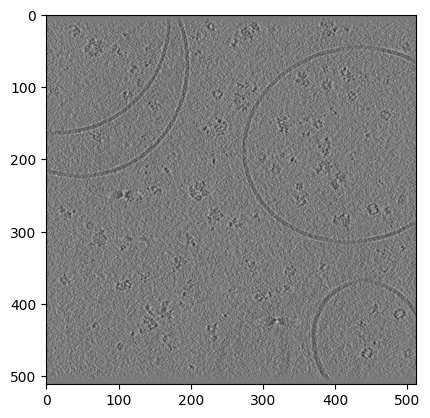

In [95]:
import mrcfile

import matplotlib.pyplot as plt
with mrcfile.open("/Users/sohamroy/Downloads/reconstruction.mrc", permissive=True) as m:
    print(m.data.shape)
    plt.imshow(m.data[230], cmap='gray')

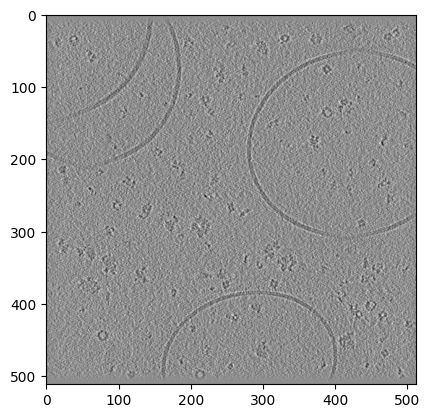

In [96]:
plt.imshow(tomo[320], cmap='gray')

In [57]:
import pandas as pd

gt = pd.read_csv(
    "/Users/sohamroy/Downloads/particle_locations.txt",
    sep=r"\s+",
    header=None,
    names=["label", "z", "y", "x", "rot1", "rot2", "rot3"]
)

gt.head()

,label,z,y,x,rot1,rot2,rot3
0,vesicle,425,180,95,NaN,NaN,NaN
1,vesicle,281,482,154,NaN,NaN,NaN
2,vesicle,15,10,86,NaN,NaN,NaN
3,vesicle,451,470,1,NaN,NaN,NaN
4,vesicle,43,64,74,NaN,NaN,NaN


In [58]:
print("Total GT objects:", len(gt))
print(gt["label"].value_counts())

Total GT objects: 1466
label
5MRC          131
1QVR          129
4CR2          119
4V94_fixed    118
1U6G          115
2CG9          112
3H84          111
3D2F          110
3QM1          108
1S3X          104
3GL1          104
3CF3          102
1BXN           88
fiducial       10
vesicle         5
Name: count, dtype: int64
